# 네이버기사 [혜민스님] 크롤링

In [3]:
from tqdm import trange, notebook
import re

In [4]:
import requests
from bs4 import BeautifulSoup

site_pre = 'https://search.naver.com/search.naver?&where=news&query=%ED%98%9C%EB%AF%BC%EC%8A%A4%EB%8B%98&sm=tab_pge&sort=1&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:dd,p:all,a:all&mynews=0&start='


site_tail = '&refresh_start=0'

news = []  

for page in notebook.tqdm(range(1, 500 ,10)):
    print('\n',page+1,"페이지\n")
    site = site_pre+str(page)+site_tail  # 1 ~ 10까지 변환됨.
    res = requests.get(site)

    soup = BeautifulSoup(res.content,'html.parser')
    
    title_list = []
    title = soup.select('a.news_tit')
    
    for t in title:
        title_list.append(t.get_text())
    
    print(title_list)
    
    text_list = []
    text = soup.select('div.dsc_wrap')
    
    for line in text:
        text_list.append(line.get_text())
        
    print(text_list)
    
    for title, line in zip(title_list, text_list):
        news.append([title,line])


 2 페이지

["남양주시, 5일 조안면서 '희망나무심기 퍼포먼스'", "베스트셀러를 '쾌도난마'하다", "수백만원짜리 명품으로 치장한 美 '풀소유' 목사들", '"그는 루이비통 재킷을 입는다" 美 목사님들을 향한 \'저격\', 한국에서라면?', '[인플루언서 프리즘] "어려운 법, 쉽게 알려 드립니다" 법조인 유튜버 인기', '[수미산정] 삶 속 고민 구체적 해법 절실', "인성마저 월클인 '대인배 끝판왕' 김연경의 5가지 인생 명언", '“한푸 아니고 한복…XX놈들 정신차려라” 이센스, 中 네티즌에 일침', "[역사속 오늘 2.15] 세계소아암의날·'Too Young' 냇 킹 콜 별세(1965)", '차한잔/ 욕심이 큰 사람은 반드시 청렴하려 한다']
[' 아픔을 땅에 묻고 새 희망을 꿈꿔보는 기회가 될 것"이라고 설명했습니다. 기념식에는 조광한 남양주시장, 혜민스님 등 주요인사를 비롯해 이지역 주민 100여 명과 관광객 등이 참석해 비대면 행사로 개최될 예정입니다. ', ' 2018년 베스트셀러 혜민 스님의 『고요할수록 밝아지는 것들』이다. 어릴 적 이야기, 할머니 이야기 뭐 이런 에세이 끝에 20개가 넘는 격언이 등장하는데 이게 뭐냐는 거다. 어디서 퍼온 건 맞는데 항간에 떠도는... ', ' 혜민 스님. tvN ‘온앤오프’ 캡처 한편 한국에서는 혜민 스님이 ‘무소유’가 아닌 ‘풀소유’ 생활을 영위하는 것이 아니냐는 논란에 휩싸인 바 있다. 혜민 스님은 지난해 11월7일 tvN 예능 프로그램 ‘온앤오프’에... ', " '남산뷰' 복층 집에 살아 논란이 됐던 혜민 스님이나 고급 수입차를 타는 목사님 등의 이야기가 그렇다. 종교인이 갖춰야 할 덕목으로 '겸허한 삶'을 꼽지만, 일부의 행태는 그것과 거리가 있기 때문이다. 그런데... ", " 이외에도 혜민스님 논란, 유승준 방지법 논란 등 다양한 최신 이슈들의 법적 쟁점을 다루며 관심을 받았다. 전·현직 대법관, 판사 등도 유튜브를 시작했다. 구독자 약 13만 명을 거느리고 있는 채널 '차산선생법률상식.

['[시론]나는 왜 열심히 일할까?', "이근→혜민스님→설민석…'화제몰이' 비연예인, 줄줄이 퇴출", '\'온앤오프\' 측 "시즌2, 2월 목표로 준비, 라인업 추후 공개" [공식입장]', '설민석→혜민스님, 욕심이 화를 부른 나쁜 예…또 통편집 굴욕[이슈와치]', '??[AP미디어동향 12월5주] KBS 라디오 편파 진행 논란外', '한밭도서관 10년 시대별 베스트셀러 작품은?', '"연예인처럼 살지 말라" 현각 스님의 \'현각 쇼\' 고백', '[운판의 시선] 공익법인수, 종교인 상위 10% 소득, 종교인 퇴직금', '혜민스님-설민석, 크고 화려한 포장이 오히려 독이 되다', '소유와 무소유, 우리의 마음은 어떻게 변해 갈까?']
[' 그래서 남을 돕겠다는 보리심이 있어야 깨닫습니다. ’ - 혜민 스님 - ■금수저와 열정 아래 내용은 지난 4일 인터넷에 게시된 ‘하버드 상위 1퍼센트들의 공통점 한 가지’라는 기사를 정리한 것이다. 한국의 성인은... ', " 앞서 혜민스님과 이근 전 대위도 각종 논란에 휩싸여 출연 중이던 방송에서 편집됐다. 비연예인 출연자의 잇단 논란에 보다 철저한 검증이 필요하다는 지적이 나온다. '스타강사' 설민석, 결국 방송 떠났다 설민석은... ", ' 진행을 맡았던 시즌1은 지난해 5월부터 12월까지 방영됐다. 장예원, 이지아, 윤박, 남규리, 써니, 손연재, 혜민스님, 구준엽, 넉살, 지연, 김완선, 김동완, 스테파니 미초바, 이하이, 이혜성, 김동완 등이 출연했다. / 사진 = tvN ', ' 혜민스님에 이어 설민석까지 일반인을 앞세운 방송 프로그램들이 거듭된 잡음을 빚고 있다. 1월 7일 SBS 측은 "신년특집 프로그램 \'AI vs 인간\' 녹화에 참여한 설민석 분량이 통편집된다"고 밝혔다. 앞서 설민석은 tvN... ', " ■ [한국편집기자협회]는 12월 28일 '제1회 올해의 온라인 편집상'에 연합뉴스 주용진 차장의 '방송·부동산·사업…세속으로 너무 달렸나 혜민스님 비로소 멈춘다' 를 선정했다. 올해의 온라인 편집상은

['\'스타트업\' 김선호, 아쉬움 가득한 종영소감 "외로워하지말고, 너답게 살아"', "윤형빈, ♥정경미 출산예정일·태명 틀려 당황('1호가')[TV핫샷]", '[포토S] 이유비, 인간 복숭아', '[포토S] 소녀시대 수영, 레드 슬립 드레스', '[포토S] 강한나, 옆트임이 포인트', '[포토S] 트와이스 사나, 청순 섹시', '[포토S] 제시, 아찔한 볼륨감', '[시선2035] 스타 스님과의 작별인사', "방탄소년단, 완벽한 '2020 MAMA'의 주인공…대상 4개·8관왕 석권[종합]", '엄정화, 코로나19 확진자와 동선 겹쳐 검사…"\'자가격리중이라 MAMA 불참"']
[' 살 소년과 그 소년을 범인으로 만들어야 하는 두 형사의 이야기로, 오는 2021년 1월 8일부터 3월 21일까지 세종문화회관 S씨어터에서 공연 예정이다. 스포티비뉴스=최영선 기자 young77@spotvnews.co.kr 혜민 스님...풀소유 논란 ing ', ' 또 함께 딸의 옷, 천 기저귀, 유축기를 구매했고, 정경미는 유축기를 보며 "이런 게 필요하다"는 반응을 보였다. 스포티비뉴스=최영선 기자 young77@spotvnews.co.kr 혜민 스님...풀소유 논란 ing ', ' 2020 엠넷 아시안 뮤직 어워즈(2020 MAMA)가 6일 오후 비대면으로 진행됐다. 배우 이유비가 포토월 행사에서 포즈를 취하고 있다. 사진 =CJ ENM 제공 혜민 스님...풀소유 논란 ing ', ' 2020 엠넷 아시안 뮤직 어워즈(2020 MAMA)가 6일 오후 비대면으로 진행됐다. 소녀시대 수영이 포즈를 취하고 있다. 사진 =CJ ENM 제공 혜민 스님...풀소유 논란 ing ', ' 2020 엠넷 아시안 뮤직 어워즈(2020 MAMA)가 6일 오후 비대면으로 진행됐다. 배우 강한나가 포토월 행사에서 포즈를 취하고 있다. 사진 =CJ ENM 제공 혜민 스님...풀소유 논란 ing ', ' 2020 엠넷 아시안 뮤직 어워즈(2020 MAMA)가 6일 오후 비대면으로 진행됐다. 트와이스 사

['남산뷰·뉴욕뷰 ‘건물주 논란’ 혜민 스님 “크게 반성…중다운 삶 살겠다”', '혜민 스님 “제 삶이 너무 창피하고 부끄러워...중다운 삶 살겠다”', '‘풀소유 논란’ 혜민스님 “크게 반성...중다운 삶 살겠다”', '혜민스님 “반성하고, 중다운 삶 살겠다”', '잇단 논란에…혜민스님 “창피하고 부끄러워, 중다운 삶 살겠다”', '뉴욕 아파트 논란 혜민스님 "중다운 삶 살도록 노력"', '풀소유 논란 혜민스님 "창피하고 부끄러워…중다운 삶 살겠다"', '혜민스님 "창피해서 \'리버뷰\' 아파트 해명못해..중다운 삶 노력"', '\'뉴욕 아파트 논란\' 혜민스님 "중다운 삶 살겠다…깊이 반성"', '혜민스님 "크게 반성하고, 중다운 삶 살겠다"']
[' 혜민스님은 논란이 커지자 지난달 15일 “이번 일로 상처받고 실망하신 모든 분들께 참회한다”며 “오늘부로 모든 활동을 내려놓고 대중 선원으로 돌아가 부처님 말씀을 다시 공부하고 수행 기도에 정진하겠다”고... ', ' ‘남산 조망’ 자택 논란에 이어 미국 뉴욕 ‘리버뷰’ 아파트 구매 의혹에 휩싸인 혜민스님이 3일 “이번을 계기로 제 삶을 크게 반성하고 중다운 삶을 살도록 노력하겠다”고 입장을 전했다. 그는 연합뉴스를 통해... ', ' 남산 뷰가 보이는 자택 논란에 이어 미국 뉴욕 아파트 구매 의혹까지 불거진 혜민스님이 반성하고 ‘중다운 삶’을 살겠다는 입장을 밝혔다. 3일 연합뉴스의 보도에 따르면, 혜민스님은 “이번을 계기로 제 삶을 크게... ', ' ‘남산 조망’ 자택 논란에 이어서 미국 뉴욕 아파트 구매 의혹이 떠오른 혜민스님이 3일 반성한다는 내용의 입장을 밝혔다. 혜민스님은 “이번을 계기로 제 삶을 크게 반성하고 중다운 삶을 살도록 노력하겠다”고... ', ' ‘남산뷰’ 자택 논란에 이어 미국 뉴욕 아파트 구매 의혹이 불거진 혜민스님이 3일 반성한다는 뜻을 전했다. 혜민스님은 이날 연합뉴스 측에 “이번을 계기로 제 삶을 크게 반성하고 중다운 삶을 살도록... ', " 최근 미국 뉴욕 아파트 구매 의

["'강원래♥'김송, 8번의 시험관시술 끝에 얻은 아들 안고 펑펑 운 사연('TV사랑...", "'건물주 논란' 혜민스님, 뉴욕 아파트도 샀다고?", "[데일리안 퇴근길뉴스] 윤석열 징계 강행하나, 진중권 추미애 사조직 '하나회...", '[띵플] 혜민, 뉴욕 아파트 매입 의혹... 시주한 사람들 심정은?', '직장에서 휴가 사용 시 상사에게 사유를 상세하게 설명하지 않아도 되는 이유', "혜민, 뉴욕 '리버뷰' 아파트도? …소유자 '라이언 봉석 주'", "'풀소유 논란' 혜민 스님…“승려된 후에도 미국에서 부동산 FLEX 했다”", "혜민스님, 이번엔 '뉴욕 리버뷰' 아파트 구매 의혹…풀소유 논란ing[종합]", "[POP이슈]'풀소유 논란' 혜민스님, 美 뉴욕 리버뷰 아파트 구매 의혹..남산뷰...", '[퇴근길뉴스] 징계위 앞두고 秋·尹 ‘신경전’']
[' 김송의 안타까운 가정사는 2일 오후 8시 30분 KBS2 \'TV는 사랑을 싣고\'에서 확인할 수 있다. 스포티비뉴스=최영선 기자 young77@spotvnews.co.kr [영상] 이대호 " 보도된 내용과 일부 달라..." 혜민 스님...풀소유 논란 ing ', ' 최근 건물주 논란으로 활동을 중단한 혜민스님에 대해 그가\xa0미국 뉴욕 아파트를 구매한 시기가\xa0정식 승려가 된 이후라는 의혹이 제기됐다. 2일 기준으로 미국 뉴욕시 등기소 웹페이지에서 부동산 등기 이력 문서... ', " ▲혜민스님 '리버뷰' 뉴욕 아파트 구매 의혹 '남산뷰' 건물주 논란으로 모든 활동을 중단한 혜민스님이 이스트강이 보이는 '리버뷰' 조망권을 가진 미국 뉴욕 아파트를 구매했다는 의혹이 나왔다. 2일 연합뉴스에 따르면... ", ' 혜민스님, 이번엔 뉴욕 리버뷰 아파트?’ 기사 바로가기(https://tinyurl.com/yyla5nhb) 연합뉴스는 혜민 스님이 승려가 된 이후 부동산을 구매한 것으로 의심되는 등기 이력을 2일 공개했습니다. 연합뉴스에 따르면... ', ' 다른 기사 트랜스젠더 남성임을 고백한 엘렌 페

['혜민스님, 이번엔 `뉴욕 리버뷰 아파트` 소유 의혹', "서울엔 남산뷰, 뉴욕엔 리버뷰?···'풀소유' 논란 혜민스님, 美부동산 의혹...", "'풀소유 논란' 혜민스님, 이번에는 美 뉴욕 아파트 구매 의혹까지", '혜민스님, 풀소유 논란... 이번엔 국내를 넘어서?', '혜민스님, 승려된 후 美 고가 아파트 구입 의혹', '‘풀소유 논란’ 혜민스님, 이번엔 美 뉴욕 아파트 소유 의혹', '혜민스님, 뉴욕 아파트 구매 의혹..이스트강 리버뷰 주상복합', "'풀소유 논란' 혜민스님, 이번엔 '뉴욕 리버뷰 아파트' 의혹", '혜민스님, 이번엔 뉴욕 ‘리버뷰’ 소유주?', '혜민스님 알고보니 국제적 풀소유? 미국 뉴욕 아파트 의혹']
[' 승려 된 뒤 구매 의혹 이스트강 조망권 리버뷰 아파트 시가 약 12억 원 김소연 기자] 혜민스님이 남산뷰 자택에 이어 뉴욕의 리버뷰 아파트 구매 의혹에 휩싸였다. 2일 연합뉴스는 "\'남산뷰\' 자택 공개 논란 끝에 모든... ', ' 최근 ‘남산뷰’ 자택 논란을 빚은 혜민스님이 정식 승려가 된 이후 미국 뉴욕의 아파트를 구입한 것으로 의심된다는 보도가 나왔다. 2일 연합뉴스는 미국 뉴욕시 등기소에서 혜민스님의 미국 이름인 ‘라이언 봉석... ', ' 혜민스님. 출처 | 본인 SNS 캡처 | 온앤오프 방송화면[스포츠서울 이용수기자] ‘남산뷰’ 자택 공개 논란 끝에 모든 활동을 중단한 혜민스님이 정식 승려가 된 이후 미국 뉴욕 아파트를 구매했다는 의혹에 휩싸였다.... ', ' 혜민스님이 뜨거운 관심을 받고 있다. 최근 방송을 통해 남산타워가 보이는 자택을 공개한 뒤로 논란이 돼 온 혜민스님이 "승려의 본분사를 다하지 못한 잘못이 크다"며 활동 중단을 선언했다. 무소유를 강조한... ', ' 혜민스님, 승려된 후 美 고가 아파트 구입 의혹 ‘무(無)소유’가 아닌 ‘풀(full)소유’ 논란으로 활동 중단을 선언한 혜민스님이 정식 승려가 된 후 미국 뉴욕에 고가의 아파트를 구매했다는 의혹이 제기됐다.2일... ', ' 삼청동 자택 

['세상의 기준', '[숨&결] 힐링팔이 스님 / 한승훈', '자본에 걸려든 명상산업', "[아유경제_기자수첩] 깨달음에는 '보여지는 것'도 필요하다", '[이재준 문화칼럼] 권력의 탐욕 화 불러온다', '[아투 유머펀치] 수행무상(修行無常)', '<김진해의 주유천하> 현각과 혜민', '\'명일동 래미안\' 거주 진선미 "아파트 환상 버려야" 지적에 비판 쇄도', '페라리·건물주…`풀소유` 논란 혜민스님 사주 봤더니 "와~"', '[주간 대중문화 이슈] ‘사유리 자발적 미혼모’ ‘프듀 제작진 실형·피해 연...']
[' 며칠 전부터 현재 불교계에서 가장 영향력 있다고 해도 과언이 아닌 혜민 스님의 일상사로 인해 수많은 사람들의 견해가 쏟아지고 있다. 그 스님과 개인적으로 친밀하고 그러다 보니 고민 아닌 고민을 듣고 함께 나누기도... ', ' 한승훈 ㅣ 종교학자·원광대 동북아시아인문사회연구소 이번 소동은 베스트셀러 저자인 승려 혜민의 거처가... 혜민의 참회와 활동중단 선언, 현각과의 화해 등으로 사태는 일단락되었다. 그러나 이 사건은 여전히... ', " 최근 '멈추면, 비로소 보이는 것들'로 유명한 혜민 스님에 대한 논박을 접하면서 불교명상 또한 영락없는 자본의 포로가 되고 있음을 느낀다. 애초에 선을 포함한 명상이 예능 또는 산업으로 자리잡아가는 과정을 보면서... ", " 최근 혜민스님에 대한 논란이 불거졌다. 그는 2012년 '멈추면, 비로소 보이는 것들'을 출간해 많은 이들의 관심을 받았다. '멈추면, 비로소 보이는 것들'은 큰 인기를 끌어 누적 판매 부수 300만 부를 돌파하며 전 세계 26개국에... ", " 운동권에서도 '탐욕의 기생충' 같다는 비판이 쏟아지고 있다. 욕심은 항상 화를 불러오며 권력처럼 허망한 것도 없다. 정치인들이 먼저 '무소유'를 배워야 할 것 같다. 천지일보,이재준,혜민스님 ", ' ‘푸른 눈의 수행자’ 현각 스님이 ‘건물주 논란’에 휩싸였던 혜민 스님을 향해 날 선 비판을 제기하면서 불교계에 적잖은 파란을 일으켰다. ‘연

['‘하룻밤 만에 돌변’ 현각 스님 저격한 박훈 “도둑놈과 뭐가 다른가?”', '“‘도둑 혜민’과 뭐가 달라?” 현각스님 저격한 박훈 변호사', "[지평선] 혜민의 '풀소유'", '현각스님 "혜민스님과 영원한 佛法 형제"', "박훈 변호사 누구?…'혜민스님 옹호' 현각스님 저격→글 삭제", "배우 박하선이 '미혼하고만 작품하겠다'는 남자 배우들 때문에 캐스팅 밀린적...", "[이슈시개]무소유→풀소유? 승려 혜민의 '무한 논란'", '“은밀한 거래?” 혜민·현각 스님이 갑작스레 화해한 이유는...(영상)', "혜민 스님 '갓물주' 논란에 재조명된 故 김수환 추기경이 남긴 재산", '박훈 변호사, 입장 번복한 현각 저격 “혜민과 뭐가 다른가”']
[' 페이스북에 “너희 둘은 철학적 깊이가 전혀 없는 모르모트(실험용 쥐)였다” 박훈(사진) 변호사가 서울타워가 보이는 서울 도심 자택 ‘건물주 논란’에 휩싸인 혜민 스님을 ‘도둑놈’, ‘기생충’이라고 비판했다가... ', ' 박훈 변호사가 ‘풀소유 논란’이 일었던 혜민스님을 작심 비판했다가 돌연 옹호하고 나선 현각스님을 저격했다. ‘민주사회를 위한 변호사모임(민변)’ 노동위원회 소속 박훈 변호사는 17일 자신의 페이스북에 “현각... ', " □베스트셀러 저자이자 대중강연, 명상문화 확산 등으로 인기를 구가하던 혜민 스님이 최근 TV에서 자신의 집을 소개한 뒤 '풀소유' 논란에 휩싸였다. 통념의 스님과는 전혀 다른 모습에서 오는 위화감에 불을 붙인 건... ", " 혜민스님\xa0논란과\xa0관련해\xa0비판글을\xa0올린\xa0현각스님이\xa0통화\xa0후\xa0언제나\xa0영원한\xa0불법의\xa0형제라고\xa0강조했습니다.\xa0이\xa0같은\xa0모습은\xa0서로가\xa0공부한\xa0것을\xa0이야기하며\xa0배우고\xa0경책해\xa0수행을\xa0발전시킨다는\xa0'탁마'를... ", ' 이투데이=유정선 기자 | (연합뉴스) 박훈 변호사가 최근 건물주 논란 등에 휩싸인 혜민스님을 저격했다가, 하루 만에 입장을 

['[정면승부] "혜민스님 정도면 재산 많은 것도 아냐, 토굴치곤 비싼 토굴”', '"너의 욕망은 무엇이더냐"…박훈 변호사, 혜민 비판한 현각스님 직격', '스님·건물주, 그리고 혜민 [스경X이슈]', '유튜버 크로커다일, "혜민-현각 스님, 갑자기 화해한 이유? 은밀한 거래" 폭로', '"원래 불교 정신…" 혜민 스님 저격한 현각 스님이 다시 용서해준 이유', '“환불해 주세요” 활동 중단 선언했던 혜민스님, 지금 완전히 큰일 났다', "혜민 스님이 지금까지 단 한 번도 '이것'을 하지 않아 논란이 되고 있습니다", '혜민스님 명상앱 악플·평점 테러..."돈 벌려고 만든 앱" 댓글+평점 1.8점 ↓', '"당신이 \'도둑 혜민\'과 뭐가 달라?"…박훈 변호사, 현각 저격', '황교익 "풀소유 혜민, 승려 아냐" 박훈 "현각, 도둑 혜민과 뭐가 달라"']
[' [정면승부] “혜민스님 정도면 재산 많은 것도 아냐, 토굴치곤 비싼 토굴” ◇ 이동형 앵커(이하 이동형)> 모 방송에서 혜민 스님이 자신의 집을 공개했습니다. 이에 평소 무소유를 말해온 혜민스님의 언행과는 일치하지... ', ' 영화 \'부러진 화살\'의 실제 인물인 박훈 변호사가 \'건물주 논란\'에 휩싸인 혜민스님을 향해 날선 비판을 했다가 "순수한 마음을 존중한다"라고 입장을 선회한 현각스님을 겨냥해 "너의 욕망은 무엇이더냐"라고 직격했다.... ', ' 다만 무슨 연유인지, 현각은 다음날 “70분간 혜민스님과 전화통화했다. 서로에 대한 사랑을 표현했고, 우리는 연락하면서 서로 배우기로 했다”고 입장을 180도 바꿔 의아함을 자아내기도 했다. 논란이 커지자 혜민은 SNS에... ', " 유튜버 크로커다일이 혜민 스님에 대한 세번째 저격 영상을 공개했다. 혜민 스님의 '풀소유' 논란을 가장 먼저 제기한 '10만 유튜버' 크로커다일은 지난 10일과 14일에 이어 17일에도 자신의 유튜브 채널 '크로커다일... ", ' 이를 접한 네티즌들은 "현각스님 너무 착하시다..." "혜민스님이 저리 세속에 물이짙

["[정윤성의 기린대로418] 혜민스님 '무소유' 수행 그리고...", '[핫키워드] 혜민스님 활동 중단 선언', '[사사건건 플러스]② ‘혜민스님’ 논란…“참회·수행” 결론?', '풀소유 논란 혜민스님, 이번엔 안거 수행 논란…왜?', '명상 앱 만들고 책 쓰고…혜민, 안거수행은 12년간 전무', "방송인 함소원이 '환승이별로 죽고 싶다'는 네티즌에게 전한 조언에는 진정성...", '혜민스님, 승려보단 사업가에 가까웠던 그 [ST이슈]', '‘무소유’ 강조 혜민스님 ‘풀소유’ 논란으로 부메랑 맞았다[이슈와치]', '\'풀소유 논란\' 혜민스님 "참회하고 모든 활동 내려놓겠다"', '혜민 스님, 활동 중단 선언']
[" 정윤성의 기린대로418 혜민스님 수행 '무소유' 강조 '풀소유' 논란 안철수 새정치 혁신플랫폼 국민의힘 전북과 동행 새만금예산 삭감 주장했다가 철회 탄소진흥원 예산 ", ' \'풀소유\'(무소유의 반대말)로 논란을 빚은 혜민 스님이 참회의 뜻을 밝히며 활동 중단을 선언했다. 혜민 스님은 15일 페이스북 등 SNS에 글을 올리고 "오늘부로 모든 활동을 내려놓고 대중 선원으로 돌아가 부처님 말씀을... ', " ■ 프로그램 : [사사건건 플러스 3] ■ 방송시간 : 11월 16일(월) 16:00~17:00 KBS1 ■ 진행 : 박찬형 기자 ■ 출연 : 최영일 시사평론가·양지열 변호사 -혜민스님 '무소유' 아닌 '풀(full)소유'? -'남산 전망 집'에 '스타트업... ", " 혜민스님이 부동산 보유 등 이른다 '풀(Full)소유' 논란 끝에 활동 중단을 선언한 가운데, 그가 수십년간 안거 수행에 참여하지 않았다는 논란도 불거졌다. 16일 연합뉴스는 불교계의 말을 인용 이같이 혜민스님이... ", ' 16일 불교계에 따르면 미국 국적자인 혜민은 1990년대 후반 미국 불광선원의 주지인 휘광스님을 은사로 출가했다. 2000년 해인사에서 사미계를 받아 예비 승려가 됐고, 2008년 직지사에서 비구계를 받아 조계종 승려가 됐다.... ', " View 

In [5]:
news

[["남양주시, 5일 조안면서 '희망나무심기 퍼포먼스'",
  ' 아픔을 땅에 묻고 새 희망을 꿈꿔보는 기회가 될 것"이라고 설명했습니다. 기념식에는 조광한 남양주시장, 혜민스님 등 주요인사를 비롯해 이지역 주민 100여 명과 관광객 등이 참석해 비대면 행사로 개최될 예정입니다. '],
 ["베스트셀러를 '쾌도난마'하다",
  ' 2018년 베스트셀러 혜민 스님의 『고요할수록 밝아지는 것들』이다. 어릴 적 이야기, 할머니 이야기 뭐 이런 에세이 끝에 20개가 넘는 격언이 등장하는데 이게 뭐냐는 거다. 어디서 퍼온 건 맞는데 항간에 떠도는... '],
 ["수백만원짜리 명품으로 치장한 美 '풀소유' 목사들",
  ' 혜민 스님. tvN ‘온앤오프’ 캡처 한편 한국에서는 혜민 스님이 ‘무소유’가 아닌 ‘풀소유’ 생활을 영위하는 것이 아니냐는 논란에 휩싸인 바 있다. 혜민 스님은 지난해 11월7일 tvN 예능 프로그램 ‘온앤오프’에... '],
 ['"그는 루이비통 재킷을 입는다" 美 목사님들을 향한 \'저격\', 한국에서라면?',
  " '남산뷰' 복층 집에 살아 논란이 됐던 혜민 스님이나 고급 수입차를 타는 목사님 등의 이야기가 그렇다. 종교인이 갖춰야 할 덕목으로 '겸허한 삶'을 꼽지만, 일부의 행태는 그것과 거리가 있기 때문이다. 그런데... "],
 ['[인플루언서 프리즘] "어려운 법, 쉽게 알려 드립니다" 법조인 유튜버 인기',
  " 이외에도 혜민스님 논란, 유승준 방지법 논란 등 다양한 최신 이슈들의 법적 쟁점을 다루며 관심을 받았다. 전·현직 대법관, 판사 등도 유튜브를 시작했다. 구독자 약 13만 명을 거느리고 있는 채널 '차산선생법률상식... "],
 ['[수미산정] 삶 속 고민 구체적 해법 절실',
  ' 이에 비해 법륜스님과 혜민스님의 책은 불교 신도가 아닌 사람도 좋아하는 베스트셀러입니다. 이 두 분 스님 이외에도 불교계에는 간간히 비신도가 사랑하는 저서를 내는 스님이 있습니다. 불교가 우리 사회에 여전히 삶의... '],
 ["인성마저 

In [6]:
import pandas as pd
df = pd.DataFrame(news)

In [7]:
df

,0,1
0,"남양주시, 5일 조안면서 '희망나무심기 퍼포먼스'","아픔을 땅에 묻고 새 희망을 꿈꿔보는 기회가 될 것""이라고 설명했습니다. 기념식에..."
1,베스트셀러를 '쾌도난마'하다,2018년 베스트셀러 혜민 스님의 『고요할수록 밝아지는 것들』이다. 어릴 적 이야...
2,수백만원짜리 명품으로 치장한 美 '풀소유' 목사들,혜민 스님. tvN ‘온앤오프’ 캡처 한편 한국에서는 혜민 스님이 ‘무소유’가 아...
3,"""그는 루이비통 재킷을 입는다"" 美 목사님들을 향한 '저격', 한국에서라면?",'남산뷰' 복층 집에 살아 논란이 됐던 혜민 스님이나 고급 수입차를 타는 목사님 ...
4,"[인플루언서 프리즘] ""어려운 법, 쉽게 알려 드립니다"" 법조인 유튜버 인기","이외에도 혜민스님 논란, 유승준 방지법 논란 등 다양한 최신 이슈들의 법적 쟁점을..."
...,...,...
495,'현각스님' 작심발언에 활동중단 선언한 '혜민스님',"출처: 연합뉴스, 세속 논란의 중심에 선 혜민스님 혜민스님이 방송활동을 비롯한 모..."
496,“환불해 달라!” 33만명 가입 혜민스님 ‘명상앱’에 불똥! [IT선빵!],명상심리 앱 코끼리는 혜민스님이 직접 사업에 뛰어들며 개발에 참여해 화제가 됐다....
497,"[MBN 프레스룸] 혜민스님 ""다 내려놓고 참회""",김태일 앵커 윤영걸 전 매경닷컴 대표 김관옥 계명대 정치외교학과 교수 김은미 기자...
498,"혜민스님, `남산타워뷰` 집 공개했다가 파문..풀소유와 가난 사이 갑론을박",최근 TV 프로그램에서 서울 도심 자택을 공개했다가 부동산 논란 등으로 활동 중단...


In [8]:
df.columns='title','text'

# 결측치 확인

In [9]:
df.isnull().sum()

title    0
text     0
dtype: int64

In [10]:
df.shape

(500, 2)

In [13]:
df['title'] = df['title'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거
df['text'] = df['text'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거

In [14]:
df

,title,text
0,남양주시 일 조안면서 희망나무심기 퍼포먼스,아픔을 땅에 묻고 새 희망을 꿈꿔보는 기회가 될 것 이라고 설명했습니다 기념식에...
1,베스트셀러를 쾌도난마 하다,년 베스트셀러 혜민 스님의 고요할수록 밝아지는 것들 이다 어릴 적 이야...
2,수백만원짜리 명품으로 치장한 美 풀소유 목사들,혜민 스님 온앤오프 캡처 한편 한국에서는 혜민 스님이 무소유 가 아...
3,그는 루이비통 재킷을 입는다 美 목사님들을 향한 저격 한국에서라면,남산뷰 복층 집에 살아 논란이 됐던 혜민 스님이나 고급 수입차를 타는 목사님 ...
4,인플루언서 프리즘 어려운 법 쉽게 알려 드립니다 법조인 유튜버 인기,이외에도 혜민스님 논란 유승준 방지법 논란 등 다양한 최신 이슈들의 법적 쟁점을...
...,...,...
495,현각스님 작심발언에 활동중단 선언한 혜민스님,출처 연합뉴스 세속 논란의 중심에 선 혜민스님 혜민스님이 방송활동을 비롯한 모...
496,환불해 달라 만명 가입 혜민스님 명상앱 에 불똥 선빵,명상심리 앱 코끼리는 혜민스님이 직접 사업에 뛰어들며 개발에 참여해 화제가 됐다 ...
497,프레스룸 혜민스님 다 내려놓고 참회,김태일 앵커 윤영걸 전 매경닷컴 대표 김관옥 계명대 정치외교학과 교수 김은미 기자...
498,혜민스님 남산타워뷰 집 공개했다가 파문 풀소유와 가난 사이 갑론을박,최근 프로그램에서 서울 도심 자택을 공개했다가 부동산 논란 등으로 활동 중단...


# 불용어 제거 및 토큰화

In [15]:
stop_words = ['혜민스님','혜믿스님', '혜민스님이', '의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '로']

In [16]:
tokenized_doc = df['title'].apply(lambda x: x.split()) #토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [17]:
print(tokenized_doc[1])

['베스트셀러를', '쾌도난마']


In [18]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc) # tokenized 데이터를 통해 dictionary로 변환
corpus = [dictionary.doc2bow(text) for text in tokenized_doc] # 코퍼스 구성

# 모델생성

In [19]:
import gensim
NUM_TOPICS = 20 # 20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=5) # TOPIC별 단어를 4개만
for topic in topics:
    print(topic)

(0, '0.016*"혜민" + 0.015*"스님" + 0.015*"다르나" + 0.011*"현각" + 0.010*"불교"')
(1, '0.076*"박훈" + 0.059*"변호사" + 0.050*"혜민과" + 0.042*"뭐가" + 0.038*"현각스님"')
(2, '0.013*"활동" + 0.013*"작별인사" + 0.013*"스님과의" + 0.013*"스타" + 0.013*"제"')
(3, '0.056*"혜민" + 0.047*"활동" + 0.046*"중단" + 0.036*"스님" + 0.020*"논란"')
(4, '0.028*"수행" + 0.024*"년간" + 0.019*"명상앱" + 0.019*"안거" + 0.014*"만든"')
(5, '0.053*"논란" + 0.042*"풀소유" + 0.021*"스님" + 0.020*"활동" + 0.017*"혜민"')
(6, '0.021*"혜민" + 0.019*"현각" + 0.019*"스님" + 0.015*"전하는" + 0.015*"작은"')
(7, '0.098*"아파트" + 0.083*"뉴욕" + 0.077*"의혹" + 0.051*"구매" + 0.047*"리버뷰"')
(8, '0.078*"풀소유" + 0.076*"논란" + 0.036*"수행" + 0.024*"해남" + 0.018*"여일"')
(9, '0.017*"혜민" + 0.017*"재산" + 0.013*"많은" + 0.013*"정면승부" + 0.013*"비싼"')
(10, '0.016*"세상" + 0.012*"수행의" + 0.012*"끝에서" + 0.012*"세계일주" + 0.012*"찾은"')
(11, '0.010*"뉴욕아파트" + 0.008*"스님" + 0.008*"혜민" + 0.005*"서민" + 0.005*"무엇일까"')
(12, '0.030*"은해사" + 0.025*"당선" + 0.020*"덕관스님" + 0.017*"반성" + 0.017*"크게"')
(13, '0.034*"혜민" + 0.024*"보이는" + 0.024*"비로소" + 0.024*"것들" +

# LDA시각화

In [20]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, mds='mmds')
pyLDAvis.display(vis)

# 문서별 TOPIC 확인

In [21]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [22]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,15.0,0.8417,"[(15, 0.8416597)]"
1,1,13.0,0.6833,"[(0, 0.016667534), (1, 0.016667534), (2, 0.016..."
2,2,19.0,0.8643,"[(19, 0.8642781)]"
3,3,19.0,0.9050,"[(19, 0.9049934)]"
4,4,19.0,0.9136,"[(19, 0.9136299)]"
5,5,17.0,0.8812,"[(17, 0.88124496)]"
6,6,10.0,0.8944,"[(10, 0.8944392)]"
7,7,6.0,0.9050,"[(6, 0.90499514)]"
8,8,11.0,0.8812,"[(11, 0.8812451)]"
9,9,15.0,0.8812,"[(15, 0.88124484)]"


# 최적의 TOPIC 개수 도출

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [24]:
df

,title,text
0,남양주시 일 조안면서 희망나무심기 퍼포먼스,아픔을 땅에 묻고 새 희망을 꿈꿔보는 기회가 될 것 이라고 설명했습니다 기념식에...
1,베스트셀러를 쾌도난마 하다,년 베스트셀러 혜민 스님의 고요할수록 밝아지는 것들 이다 어릴 적 이야...
2,수백만원짜리 명품으로 치장한 美 풀소유 목사들,혜민 스님 온앤오프 캡처 한편 한국에서는 혜민 스님이 무소유 가 아...
3,그는 루이비통 재킷을 입는다 美 목사님들을 향한 저격 한국에서라면,남산뷰 복층 집에 살아 논란이 됐던 혜민 스님이나 고급 수입차를 타는 목사님 ...
4,인플루언서 프리즘 어려운 법 쉽게 알려 드립니다 법조인 유튜버 인기,이외에도 혜민스님 논란 유승준 방지법 논란 등 다양한 최신 이슈들의 법적 쟁점을...
...,...,...
495,현각스님 작심발언에 활동중단 선언한 혜민스님,출처 연합뉴스 세속 논란의 중심에 선 혜민스님 혜민스님이 방송활동을 비롯한 모...
496,환불해 달라 만명 가입 혜민스님 명상앱 에 불똥 선빵,명상심리 앱 코끼리는 혜민스님이 직접 사업에 뛰어들며 개발에 참여해 화제가 됐다 ...
497,프레스룸 혜민스님 다 내려놓고 참회,김태일 앵커 윤영걸 전 매경닷컴 대표 김관옥 계명대 정치외교학과 교수 김은미 기자...
498,혜민스님 남산타워뷰 집 공개했다가 파문 풀소유와 가난 사이 갑론을박,최근 프로그램에서 서울 도심 자택을 공개했다가 부동산 논란 등으로 활동 중단...


In [25]:
df = df.dropna(how = 'any')
df['title'] = df['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

okt = Okt()
tokenized_data = []

for sentence in df['title']:
    temp_X = okt.nouns(sentence) # 명사만 추출
    temp_X = [word for word in temp_X if len(word)>1] # 2글자 이상만 추출
    tokenized_data.append(temp_X)


In [26]:
tokenized_data = pd.DataFrame(tokenized_data)

In [27]:
tokenized_data.to_csv("../data/review_tokenized.csv")

# TOPIC 개수별 응집도 구하기

100%|████████████████████████████████████████████████████████████████████████████████████████| 501/501 [00:00<?, ?it/s]
2021-03-31 22:31:47,729 : INFO : using symmetric alpha at 0.5
2021-03-31 22:31:47,730 : INFO : using symmetric eta at 0.5
2021-03-31 22:31:47,732 : INFO : using serial LDA version on this node
2021-03-31 22:31:47,734 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 501 documents, updating model once every 501 documents, evaluating perplexity every 501 documents, iterating 50x with a convergence threshold of 0.001000
2021-03-31 22:31:47,734 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-03-31 22:31:47,853 : INFO : -4.021 per-word bound, 16.2 perplexity estimate based on a held-out corpus of 501 documents with 428 words
2021-03-31 22:31:47,853 : INFO : PROGRESS: pass 0, at document #501/501


Number of unique tokens: 27
Number of documents: 501


2021-03-31 22:31:47,937 : INFO : topic #0 (0.500): 0.083*"중단" + 0.057*"도둑" + 0.056*"반성" + 0.056*"변호사" + 0.056*"다른" + 0.055*"다운" + 0.054*"저격" + 0.045*"무엇" + 0.044*"코로나" + 0.043*"남산"
2021-03-31 22:31:47,938 : INFO : topic #1 (0.500): 0.080*"뉴스" + 0.068*"남산" + 0.064*"승려" + 0.057*"명상" + 0.054*"다운" + 0.054*"변호사" + 0.052*"건물" + 0.051*"저격" + 0.049*"무소유" + 0.045*"이슈"
2021-03-31 22:31:47,940 : INFO : topic diff=0.496393, rho=1.000000
2021-03-31 22:31:47,942 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2021-03-31 22:31:50,162 : INFO : 7 accumulators retrieved from output queue
2021-03-31 22:31:50,176 : INFO : accumulated word occurrence stats for 249 virtual documents
2021-03-31 22:31:50,239 : INFO : using symmetric alpha at 0.125
2021-03-31 22:31:50,240 : INFO : using symmetric eta at 0.125
2021-03-31 22:31:50,240 : INFO : using serial LDA version on this node
2021-03-31 22:31:50,241 : INFO : running online (single-p

2021-03-31 22:31:58,390 : INFO : topic #25 (0.038): 0.269*"저격" + 0.202*"변호사" + 0.136*"비판" + 0.069*"도둑" + 0.069*"남산" + 0.069*"미황사" + 0.069*"다운" + 0.069*"뉴스" + 0.003*"미국" + 0.003*"중단"
2021-03-31 22:31:58,390 : INFO : topic #5 (0.038): 0.589*"뉴스" + 0.120*"저격" + 0.120*"도둑" + 0.061*"다른" + 0.061*"다운" + 0.002*"중단" + 0.002*"반성" + 0.002*"크게" + 0.002*"모든" + 0.002*"미국"
2021-03-31 22:31:58,391 : INFO : topic #9 (0.038): 0.346*"남산" + 0.139*"명상" + 0.105*"공개" + 0.070*"안거" + 0.070*"뉴스" + 0.036*"중단" + 0.036*"미국" + 0.036*"무소유" + 0.036*"반성" + 0.036*"이슈"
2021-03-31 22:31:58,392 : INFO : topic #11 (0.038): 0.319*"중단" + 0.183*"이슈" + 0.092*"건물" + 0.092*"모든" + 0.092*"승려" + 0.047*"공개" + 0.047*"미황사" + 0.047*"뉴스" + 0.047*"땅끝" + 0.002*"도둑"
2021-03-31 22:31:58,393 : INFO : topic diff=18.270412, rho=1.000000
2021-03-31 22:31:58,396 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2021-03-31 22:32:00,653 : INFO : 7 accumulators retrieved from

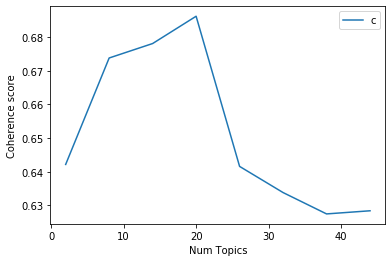

In [28]:
# 토픽 갯수별 응집도 구하기

from tqdm import tqdm
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pyLDAvis.gensim 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
    coherence_values = [] 
    model_list = [] 
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model) 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence()) 
    return model_list, coherence_values 

def find_optimal_number_of_topics(dictionary, corpus, processed_data): 
    limit = 50; #토픽 마지막갯수
    start = 2; #토픽 시작갯수
    step = 6; 
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, 
                                                            texts=processed_data, start=start, limit=limit, step=step) 
    x = range(start, limit, step) 
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best') 
    plt.show() 


processed_data = [sent.strip().split(",") for sent in tqdm(open('../data/review_tokenized.csv', 'r', encoding='utf-8').readlines())]
dictionary = corpora.Dictionary(processed_data) # 출현빈도가 적거나 자주 등장하는 단어는 제거 
dictionary.filter_extremes(no_below=10, no_above=0.05)
corpus = [dictionary.doc2bow(text) for text in processed_data]
print('Number of unique tokens: %d' % len(dictionary)) 
print('Number of documents: %d' % len(corpus))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
    
# 최적의 토픽 수 찾기 
find_optimal_number_of_topics(dictionary, corpus, processed_data)


- 약 20개의 TOPIC일 때 응집도가 최고점으로 나타난다. 

In [29]:
tokenized_doc = df['title'].apply(lambda x: x.split()) #토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [30]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc) # tokenized 데이터를 통해 dictionary로 변환
corpus = [dictionary.doc2bow(text) for text in tokenized_doc] # 코퍼스 구성

2021-03-31 22:32:19,688 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-03-31 22:32:19,698 : INFO : built Dictionary(1852 unique tokens: ['남양주시', '일', '조안면서', '퍼포먼스', '희망나무심기']...) from 500 documents (total 3753 corpus positions)


In [32]:
import gensim
NUM_TOPICS = 20 # 20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4) # TOPIC별 단어를 4개만
for topic in topics:
    print(topic)

2021-03-31 22:32:25,924 : INFO : using symmetric alpha at 0.05
2021-03-31 22:32:25,925 : INFO : using symmetric eta at 0.05
2021-03-31 22:32:25,926 : INFO : using serial LDA version on this node
2021-03-31 22:32:25,932 : INFO : running online (multi-pass) LDA training, 20 topics, 15 passes over the supplied corpus of 500 documents, updating model once every 500 documents, evaluating perplexity every 500 documents, iterating 50x with a convergence threshold of 0.001000
2021-03-31 22:32:26,124 : INFO : -24.905 per-word bound, 31419167.2 perplexity estimate based on a held-out corpus of 500 documents with 3753 words
2021-03-31 22:32:26,124 : INFO : PROGRESS: pass 0, at document #500/500
2021-03-31 22:32:26,266 : INFO : topic #12 (0.050): 0.015*"혜민" + 0.015*"스님" + 0.008*"역설" + 0.008*"사람이니까" + 0.008*"중" + 0.008*"포토" + 0.008*"만든" + 0.008*"권력의" + 0.008*"전문가" + 0.008*"활동"
2021-03-31 22:32:26,267 : INFO : topic #10 (0.050): 0.015*"것들" + 0.013*"논란" + 0.010*"다" + 0.010*"멈추면" + 0.010*"스님" + 0.010*

2021-03-31 22:32:27,314 : INFO : topic #8 (0.050): 0.043*"풀소유" + 0.036*"혜민" + 0.028*"삶" + 0.028*"중다운" + 0.027*"논란" + 0.026*"살겠다" + 0.018*"크게" + 0.017*"스님" + 0.016*"뭐가" + 0.015*"박훈"
2021-03-31 22:32:27,314 : INFO : topic #17 (0.050): 0.021*"현각" + 0.012*"주지" + 0.012*"덕관스님" + 0.012*"당선" + 0.012*"후보에" + 0.012*"은해사" + 0.011*"혜민" + 0.009*"만나면" + 0.009*"부모를" + 0.009*"스님"
2021-03-31 22:32:27,315 : INFO : topic #12 (0.050): 0.018*"혜민" + 0.015*"년간" + 0.015*"안거" + 0.015*"스님" + 0.015*"수행" + 0.011*"만든" + 0.011*"명상앱" + 0.011*"전무" + 0.010*"승려된" + 0.008*"역설"
2021-03-31 22:32:27,316 : INFO : topic diff=0.032151, rho=0.353553
2021-03-31 22:32:27,412 : INFO : -7.713 per-word bound, 209.8 perplexity estimate based on a held-out corpus of 500 documents with 3753 words
2021-03-31 22:32:27,413 : INFO : PROGRESS: pass 7, at document #500/500
2021-03-31 22:32:27,477 : INFO : topic #7 (0.050): 0.019*"전하는" + 0.019*"작은" + 0.015*"행복을" + 0.015*"그림전" + 0.013*"논란" + 0.008*"혜민" + 0.008*"않아" + 0.008*"데일리안" + 0.008*"영끌"

2021-03-31 22:32:28,458 : INFO : topic #12 (0.050): 0.017*"혜민" + 0.016*"안거" + 0.016*"수행" + 0.016*"년간" + 0.014*"스님" + 0.012*"만든" + 0.012*"명상앱" + 0.012*"전무" + 0.011*"승려된" + 0.008*"중"
2021-03-31 22:32:28,459 : INFO : topic #19 (0.050): 0.017*"현각" + 0.015*"박훈" + 0.013*"현각스님" + 0.013*"변호사" + 0.011*"저격" + 0.009*"종교인" + 0.009*"말" + 0.009*"맹비난" + 0.009*"바꾼" + 0.009*"무엇"
2021-03-31 22:32:28,459 : INFO : topic #18 (0.050): 0.014*"중단" + 0.014*"활동" + 0.014*"코로나" + 0.009*"평점" + 0.009*"년" + 0.009*"논란" + 0.009*"점" + 0.005*"입장" + 0.005*"선언" + 0.005*"명상앱"
2021-03-31 22:32:28,460 : INFO : topic #4 (0.050): 0.010*"뉴스" + 0.010*"길" + 0.010*"이슈와치" + 0.010*"대" + 0.010*"플렉스" + 0.010*"뒤로" + 0.005*"소유" + 0.005*"좋아요" + 0.005*"알아서" + 0.005*"통편집"
2021-03-31 22:32:28,461 : INFO : topic diff=0.011826, rho=0.258199
2021-03-31 22:32:28,557 : INFO : -7.636 per-word bound, 198.9 perplexity estimate based on a held-out corpus of 500 documents with 3753 words
2021-03-31 22:32:28,558 : INFO : PROGRESS: pass 14, at document

(0, '0.059*"남산뷰" + 0.034*"이어" + 0.014*"논란" + 0.012*"활동중단"')
(1, '0.015*"혜민" + 0.010*"스님" + 0.010*"활동" + 0.010*"풀소유"')
(2, '0.018*"비싼" + 0.018*"토굴" + 0.014*"정도면" + 0.014*"정면승부"')
(3, '0.028*"스님" + 0.020*"혜민" + 0.015*"스타" + 0.011*"포토"')
(4, '0.010*"뉴스" + 0.010*"길" + 0.010*"이슈와치" + 0.010*"대"')
(5, '0.051*"박훈" + 0.048*"혜민과" + 0.037*"변호사" + 0.035*"뭐가"')
(6, '0.014*"현각은" + 0.014*"행동대장" + 0.013*"논란에" + 0.011*"삶"')
(7, '0.020*"작은" + 0.020*"전하는" + 0.016*"행복을" + 0.016*"그림전"')
(8, '0.044*"풀소유" + 0.038*"혜민" + 0.037*"삶" + 0.035*"중다운"')
(9, '0.093*"아파트" + 0.079*"의혹" + 0.078*"뉴욕" + 0.068*"논란"')
(10, '0.028*"것들" + 0.023*"보이는" + 0.023*"비로소" + 0.015*"논란"')
(11, '0.029*"스님" + 0.028*"혜민" + 0.025*"변호사" + 0.025*"박훈"')
(12, '0.017*"혜민" + 0.017*"안거" + 0.017*"수행" + 0.016*"년간"')
(13, '0.066*"논란" + 0.048*"혜민" + 0.045*"풀소유" + 0.035*"활동"')
(14, '0.013*"스님의" + 0.013*"끝에서" + 0.013*"세상" + 0.013*"수행의"')
(15, '0.052*"아파트" + 0.040*"중다운" + 0.039*"삶" + 0.037*"뉴욕"')
(16, '0.014*"코로나" + 0.009*"며" + 0.009*"이후의" + 0.009*"칼럼"'